In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [55]:
img1 = cv.imread('../images_2023-06-23_10:43:52.375111/36.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('../images_2023-06-23_10:43:52.375111/100.jpg', cv.IMREAD_GRAYSCALE)

In [56]:
orb = cv.ORB_create()
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

kp1, des1 = orb.detectAndCompute(img1,None) # query
kp2, des2 = orb.detectAndCompute(img2,None) # train

matches = bf.match(des1, des2)
print(len(matches))
pts1 = []
pts2 = []
for match in matches:
    pts1.append(kp1[match.queryIdx].pt)
    pts2.append(kp2[match.trainIdx].pt)

print(len(pts1))


196
196


In [57]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
print(len(pts1))
F, mask = cv.findFundamentalMat(pts1,pts2,cv.RANSAC)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

196


In [58]:
len(pts1)

150

In [59]:
def drawlines(img1,img2,lines,pts1,pts2):
     ''' img1 - image on which we draw the epilines for the points in img2
     lines - corresponding epilines '''
     r,c = img1.shape
     img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
     img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
     for r,pt1,pt2 in zip(lines,pts1,pts2):
         color = tuple(np.random.randint(0,255,3).tolist())
         x0,y0 = map(int, [0, -r[2]/r[1] ])
         x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
         img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
         img1 = cv.circle(img1,tuple(pt1),5,color,-1)
         img2 = cv.circle(img2,tuple(pt2),5,color,-1)
     return img1,img2

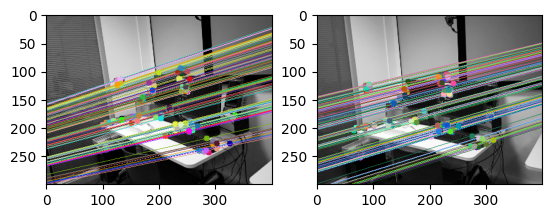

In [60]:
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()